#### DBSCAN and Use-case for exploring anomalic instances:

In [1]:
# tabular manipulation:
import numpy as np
import pandas as pd
# visualization:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
# sklearn for scaling and clustering:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
# environment:
from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### We will need to proceed through several operational steps to achieve utility from DBSCAN:

- Select what variables/features that we wish to examine
- Scale these features (DBSCAN is going to be useful for continuous variables)
- Ensure that our features are in a numpy array for fitting DBSCAN
- Select our epsilon and min_neighbors to fit our clusters
- Use our clusters to label outliers
- Explore our clusters

In [3]:
# select what features we wish to examine

In [4]:
selected_feats = ['Fresh', 'Milk', 'Grocery']

In [5]:
# note: choosing continuous variables is going to be significantly more valuable for distance based clustering as points
# in space will not inherently snap to any given set values and density will mean more as a result

In [6]:
# note: we will treat df as if it has already been split into train, validate test and we are examining train

In [7]:
# We will create a scaler:
# Make it
# Fit it
# Use it
minmax = MinMaxScaler()

In [8]:
scaled_features = minmax.fit_transform(df[selected_feats])

In [9]:
# examine our numpy array
scaled_features

array([[0.11294004, 0.13072723, 0.08146416],
       [0.06289903, 0.13282409, 0.10309667],
       [0.05662161, 0.11918086, 0.08278992],
       ...,
       [0.1295431 , 0.21013575, 0.32594285],
       [0.091727  , 0.02622442, 0.02402535],
       [0.02482434, 0.02237109, 0.02702178]])

In [10]:
# note: the output of the scaler is already a numpy array
# this is suitable for feeding into our DBSCAN model
type(scaled_features)

numpy.ndarray

In [11]:
# glue the scaled information back into df:
scaled_cols = [col + '_scaled' for col in selected_feats]

In [12]:
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=scaled_cols)

In [13]:
scaled_df

,Fresh_scaled,Milk_scaled,Grocery_scaled
customer_id,,,
0,0.112940,0.130727,0.081464
1,0.062899,0.132824,0.103097
2,0.056622,0.119181,0.082790
3,0.118254,0.015536,0.045464
4,0.201626,0.072914,0.077552
...,...,...,...
435,0.264829,0.163338,0.172715
436,0.349761,0.018736,0.008202
437,0.129543,0.210136,0.325943


In [14]:
df = df.merge(scaled_df, on=df.index)

In [15]:
df.head()

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_scaled,Milk_scaled,Grocery_scaled
0,0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.130727,0.081464
1,1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.132824,0.103097
2,2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.119181,0.082790
3,3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.015536,0.045464
4,4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.072914,0.077552


In [16]:
# Create our DBSCAN model:

In [17]:
# make it, fit it, use it

In [18]:
df.shape

(440, 12)

In [19]:
# make the object
dbsc = DBSCAN(eps = 0.1, min_samples=20)

In [20]:
# fit it

In [21]:
dbsc.fit(scaled_features)

DBSCAN(eps=0.1, min_samples=20)

In [22]:
# use it:
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [23]:
df['labels'] = dbsc.labels_

In [24]:
df[selected_feats + ['labels']].head()

,Fresh,Milk,Grocery,labels
0,12669,9656,7561,0
1,7057,9810,9568,0
2,6353,8808,7684,0
3,13265,1196,4221,0
4,22615,5410,7198,0


In [25]:
df.labels.value_counts()

 0    409
-1     31
Name: labels, dtype: int64

In [26]:
# We have our cluster labels now:
# Clusters: 1 (label: 0)
# Outliers: (Label: -1)

In [27]:
# What now?

In [28]:
# Explore!

<AxesSubplot:xlabel='Fresh', ylabel='Milk'>

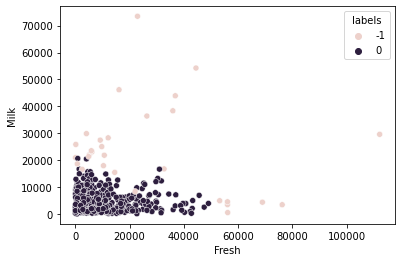

In [29]:
sns.scatterplot(x='Fresh',y='Milk', hue='labels', data=df)

<AxesSubplot:xlabel='Fresh', ylabel='Grocery'>

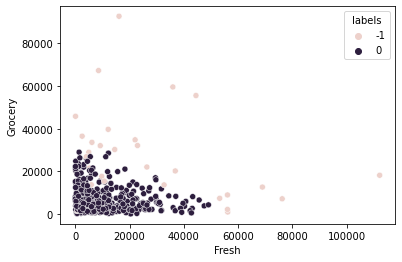

In [30]:
sns.scatterplot(x='Fresh',y='Grocery', hue='labels', data=df)

In [31]:
# let's examine it on a 3D scale

Text(0.5, 0, 'Grocery')

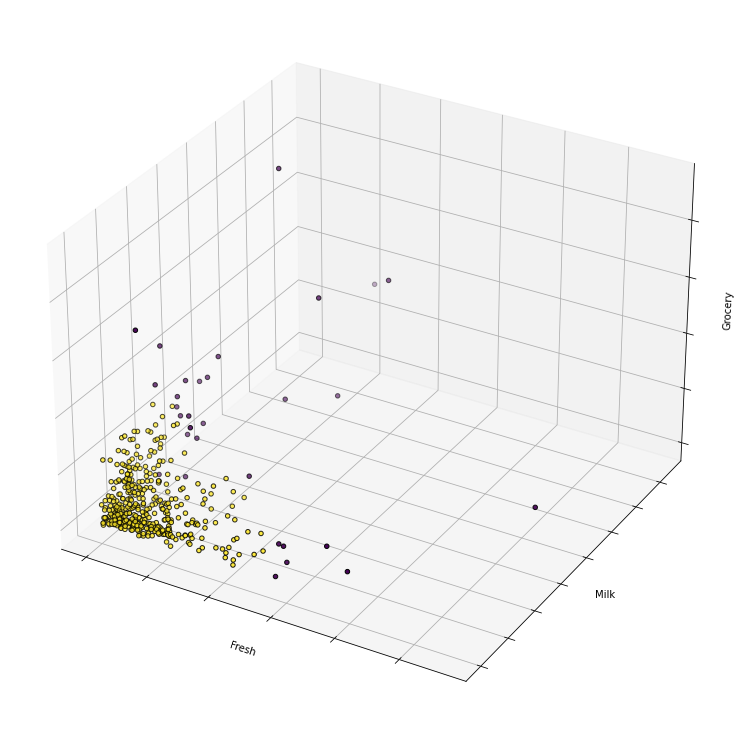

In [32]:
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(df.Fresh,
          df.Milk,
          df.Grocery,
          c=df.labels,
          edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

In [33]:
# Initial Takeaways:
#  - We have at least ~10 points that are definite outliers
#  - We have some data points that may or may not belong to the main cluster
#  - Out of the dimensions we observed, there does not appear to be need for more than one cluster
#  - We may want to be less strict about our hyperparemters to catch the data points that arent as extreme as the
#         furthest outliers in the data set

### Looking At Curriculumn Logs

In [34]:
## getting the dataframe from csv using seperators and the column specified form the list

colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
df = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [35]:
df.info() ## looking at out dataframe columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1018810.0,504.398331,276.093750,1.0,302.0,510.0,721.0,1082.0
cohort_id,965313.0,55.698227,40.790555,1.0,28.0,51.0,59.0,166.0


In [37]:
## setting the date column to datetime

df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)
df = df.drop(columns = {'date'})

In [38]:
df.head(3)

,endpoint,user_id,cohort_id,source_ip
date,,,,
2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61


In [39]:
df.isna().sum()

endpoint         1
user_id          0
cohort_id    53497
source_ip        0
dtype: int64

In [40]:
df = df.dropna() ## <-- dropping the nulls 

df.isna().sum() ## <-- quality assurance check

endpoint     0
user_id      0
cohort_id    0
source_ip    0
dtype: int64

In [41]:
df = df.sample(50000) ## <-- taking a sample of our dataframe 
df.shape ## <-- quality assurance check

(50000, 4)

In [42]:
## building our selected features list from our continuous variables

selected_feats = ['user_id', 'cohort_id']

In [43]:
# We will create a scaler:
# Make it
# Fit it
# Use it
minmax = MinMaxScaler()

In [44]:
## scaling our selected features
scaled_features = minmax.fit_transform(df[selected_feats])

In [45]:
# examine our numpy array
scaled_features

array([[0.6037037 , 0.16363636],
       [0.57407407, 0.33939394],
       [0.85      , 0.83030303],
       ...,
       [0.73888889, 0.79393939],
       [0.15740741, 0.13333333],
       [0.73611111, 0.79393939]])

In [46]:
# glue the scaled information back into df:
scaled_cols = [col + '_scaled' for col in selected_feats]

In [47]:
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=scaled_cols)
scaled_df.head(3)

,user_id_scaled,cohort_id_scaled
date,,
2020-08-03,0.603704,0.163636
2020-05-27,0.574074,0.339394
2021-05-26,0.850000,0.830303


In [48]:
## looking at our user_id_scaled values making sure it's correctly scaled
scaled_df.user_id_scaled.value_counts()

0.009259    1034
0.058333     850
0.048148     676
0.457407     457
0.000000     420
            ... 
0.425926       1
0.718519       1
0.128704       1
0.979630       1
0.982407       1
Name: user_id_scaled, Length: 960, dtype: int64

In [49]:
scaled_df.shape ## <-- looking at out dataframe shape

(50000, 2)

In [50]:
# make the object
dbsc = DBSCAN(eps = 0.1, min_samples=20)

In [51]:
# fit it
dbsc.fit(scaled_features)

DBSCAN(eps=0.1, min_samples=20)

In [52]:
# use it:
dbsc.labels_

array([0, 1, 2, ..., 2, 0, 2])

In [53]:
df['user_id_scaled'] = scaled_df['user_id_scaled'] ## building upon our original dataframe
df['cohort_id_scaled'] = scaled_df['cohort_id_scaled']

df.head(3) ## <-- quality assurance check

,endpoint,user_id,cohort_id,source_ip,user_id_scaled,cohort_id_scaled
date,,,,,,
2020-08-03,appendix/professional-development/offer-letters,653,28.0,66.69.44.196,0.603704,0.163636
2020-05-27,appendix/git/intellij,621,57.0,136.50.17.203,0.574074,0.339394
2021-05-26,java-ii/arrays,919,138.0,72.191.142.5,0.850000,0.830303


In [54]:
df['labels'] = dbsc.labels_ ## <-- making our cluster columns

In [55]:
df.labels.value_counts() ## <-- looking at out cluster label value counts

 0    24340
 1    16035
 2     8244
 5      570
 3      540
 6       98
 4       68
 7       47
 8       45
-1       13
Name: labels, dtype: int64

In [56]:
df[selected_feats + ['labels']].head() ## <-- looking at features and our cluster labels

,user_id,cohort_id,labels
date,,,
2020-08-03,653,28.0,0
2020-05-27,621,57.0,1
2021-05-26,919,138.0,2
2018-04-17,120,23.0,0
2020-04-24,545,28.0,0


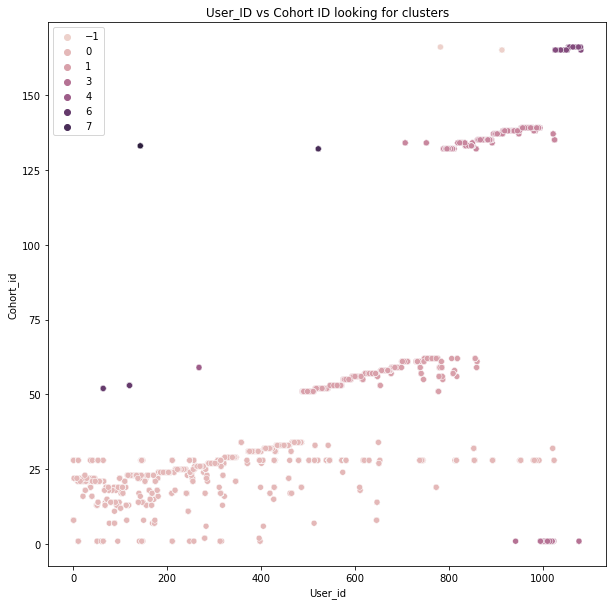

In [57]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='user_id',y='cohort_id', hue='labels', data=df)
plt.xlabel('User_id')
plt.ylabel('Cohort_id')
plt.title('User_ID vs Cohort ID looking for clusters')
plt.legend()
plt.show()

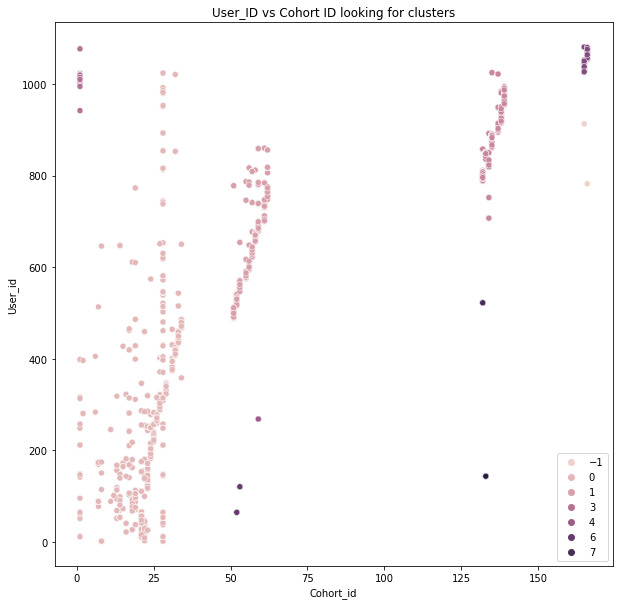

In [58]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='cohort_id',y='user_id', hue='labels', data=df)
plt.ylabel('User_id')
plt.xlabel('Cohort_id')
plt.title('User_ID vs Cohort ID looking for clusters')
plt.legend()
plt.show()